In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets,tree
from sklearn.tree import export_graphviz
from sklearn import externals
from io import StringIO
import pydotplus

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Fraud_check.csv")
dataset.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
dataset.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [4]:
dataset.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
dataset.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


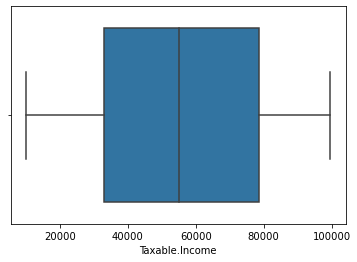

In [6]:
ax = sns.boxplot(dataset['Taxable.Income'])

No outliers

In [7]:
plt.rcParams["figure.figsize"]=9,5

Skew:0.030014788906377175
Kurtosis: -1.1997824607083138


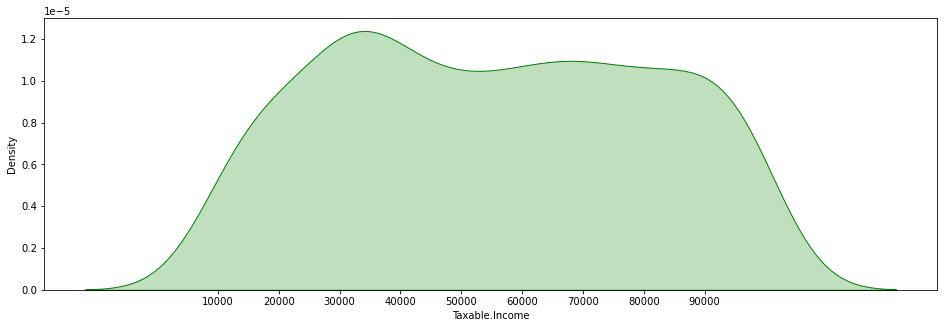

In [8]:
plt.figure(figsize=(16,5))
print("Skew:{}".format(dataset['Taxable.Income'].skew()))
print("Kurtosis: {}".format(dataset['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(dataset['Taxable.Income'],shade=True,color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

The data is Skwed on the right
The data has negative Kurtosis

In [9]:
obj_colum = dataset.select_dtypes(include='object').columns.tolist()

<ipython-input-10-7d25f580155a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)
<ipython-input-10-7d25f580155a>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2,2,i)


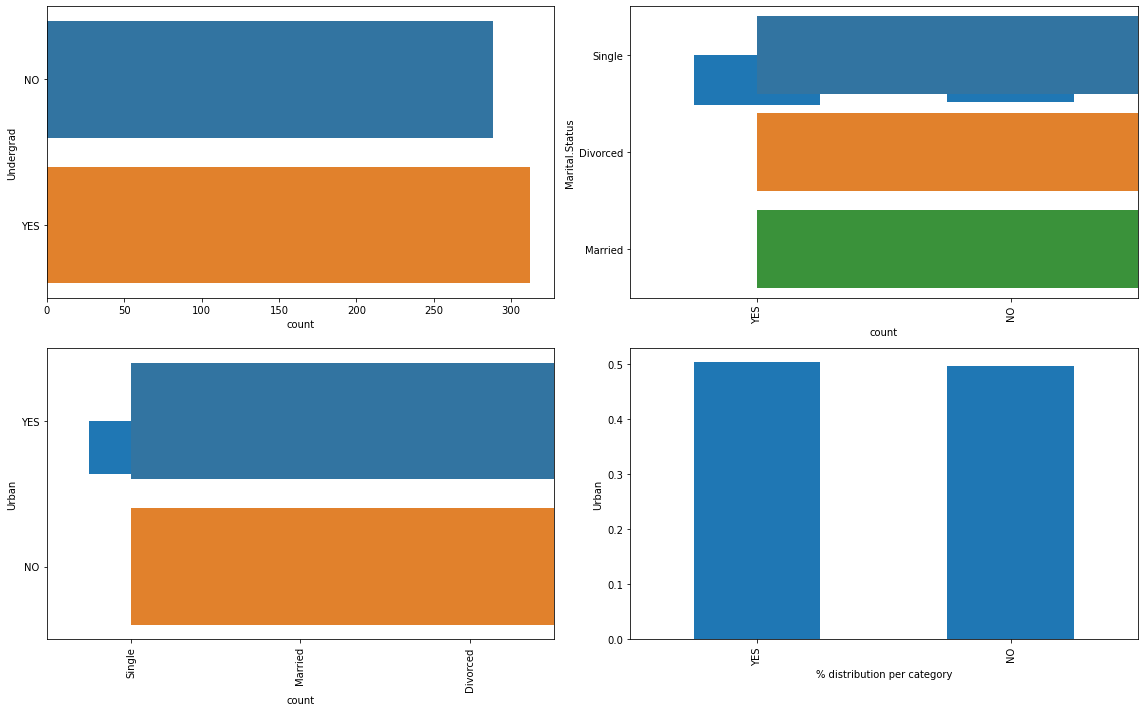

In [10]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dataset,y=col)
    plt.subplot(2,2,i+1)
    dataset[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [11]:
num_columns = dataset.select_dtypes(exclude='object').columns.tolist()

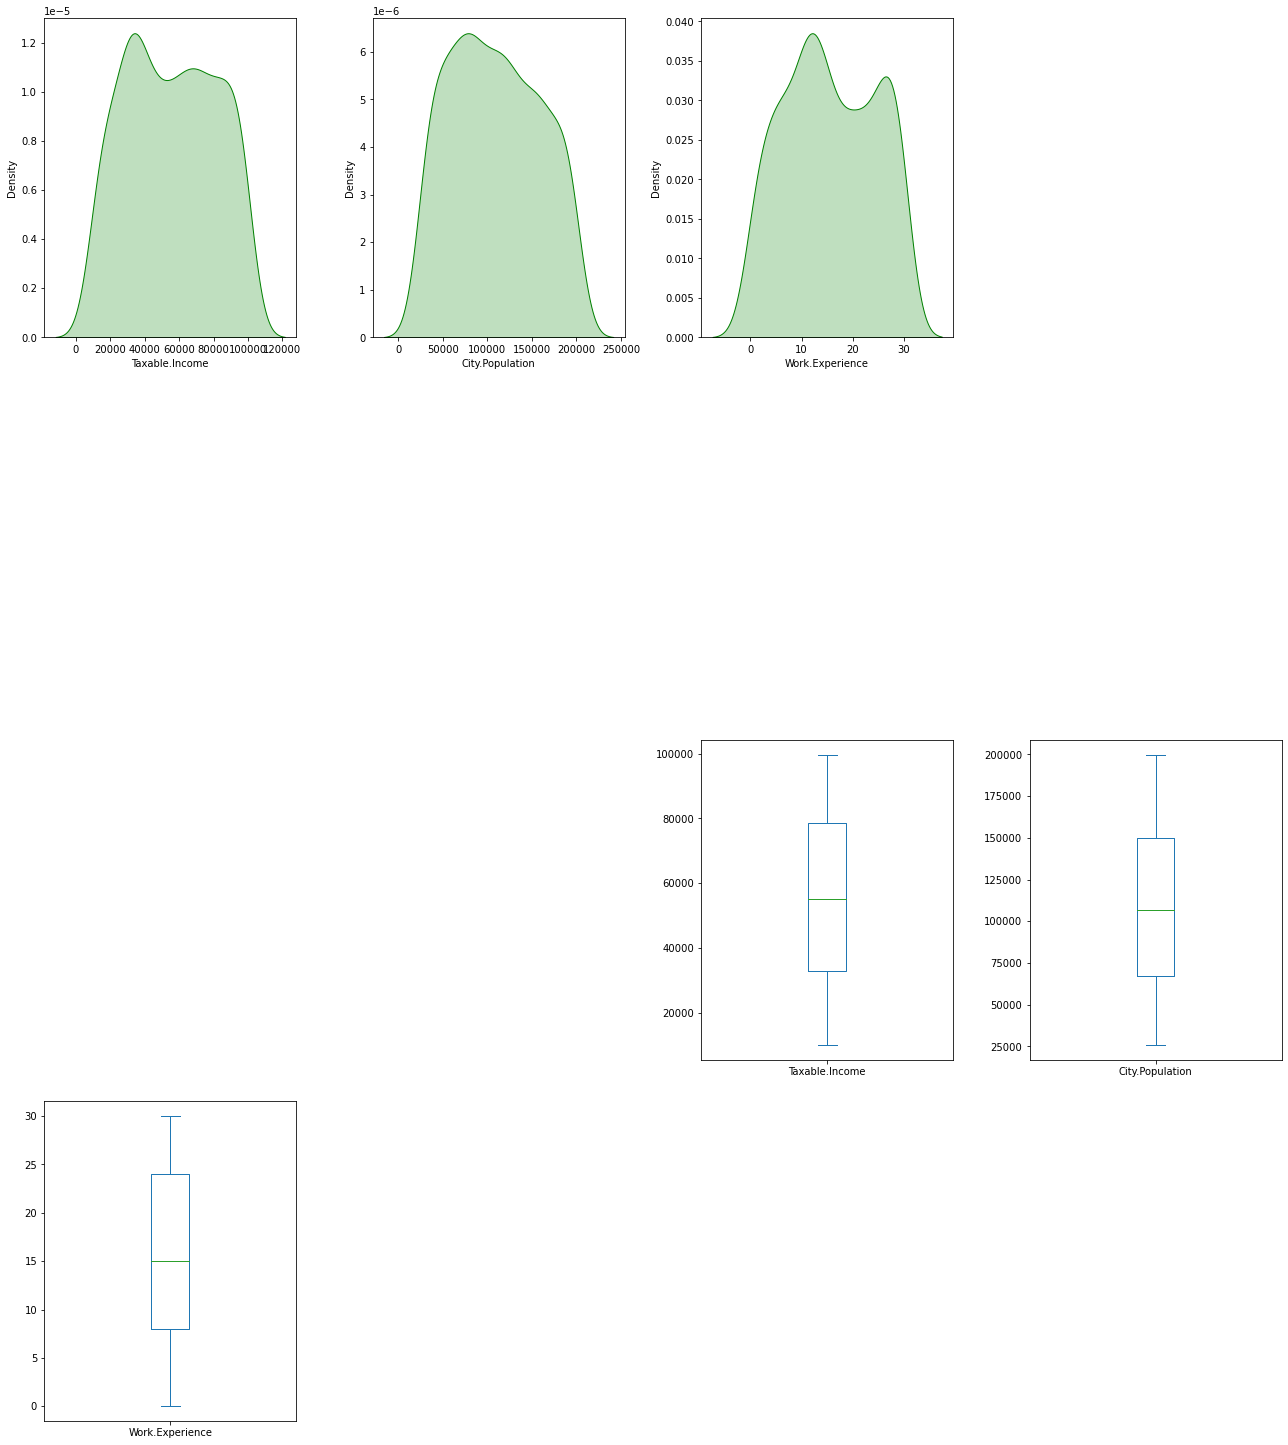

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [12]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(dataset[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    dataset[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = dataset[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [13]:
dataset = pd.get_dummies(dataset, columns = ['Undergrad','Marital.Status','Urban'])


In [14]:
carr = dataset.corr()

In [15]:
corr = dataset.corr()

<AxesSubplot:>

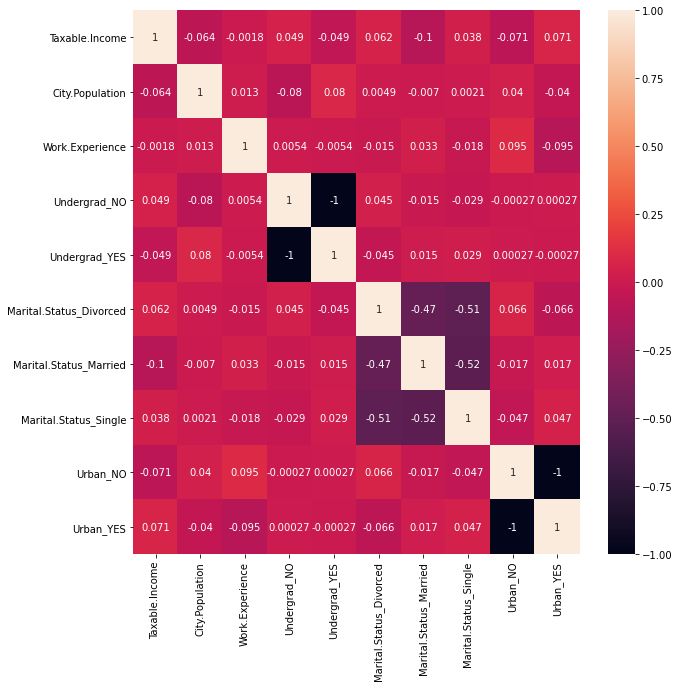

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

Randam Forest

In [17]:
dataset['Taxable.Income']=pd.cut(dataset['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'])

In [18]:
list(dataset.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [19]:
X = dataset.iloc[:,1:10]
y = dataset.iloc[:,0]

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
y_train.value_counts()

good     383
risky     97
Name: Taxable.Income, dtype: int64

In [22]:
model = RF(n_jobs=4, n_estimators = 150, oob_score = True, criterion = 'entropy')
model.fit(x_train,y_train)
model.oob_score_

0.7416666666666667

In [23]:
pred_train = model.predict(x_train)

In [24]:
accuracy_score(y_train,pred_train)

1.0

In [25]:
confusion_matrix(y_train,pred_train)

array([[383,   0],
       [  0,  97]], dtype=int64)

In [26]:
pred_test = model.predict(x_test)

In [27]:
accuracy_score(y_test,pred_test)

0.6916666666666667

In [28]:
confusion_matrix(y_test,pred_test)

array([[83, 10],
       [27,  0]], dtype=int64)

In [29]:
dataset_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [30]:
dataset_t

,Actual,Predicted
567,risky,good
76,good,good
148,good,good
550,good,risky
358,good,good
...,...,...
29,good,good
93,risky,good
260,good,good
17,good,good


In [31]:
cols = list(dataset.columns)

In [32]:
predictors = cols[1:10]
target = cols[0]

In [33]:
tree1 = model.estimators_[20]

In [34]:
dot_data = StringIO()

In [35]:
export_graphviz(tree1, out_file = dot_data, feature_names =predictors, class_names = target, filled =True,rounded=True,impurity =False,proportion=False,precision =2)

In [36]:

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [41]:
import os
os.environ["PATH"] += os.pathsep + r'C:\anaconda3\bin\Graphviz\bin'


In [42]:

graph.write_png('fraud_full.png')

True

In [45]:
rf_small = RF(n_estimators=10, max_depth= 3)

In [47]:
rf_small.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10)

In [48]:
tree_small= rf_small.estimators_[5]

In [55]:
export_graphviz(tree_small, out_file = dot_data, feature_names = predictors, rounded = True, precision = 1)

In [57]:
graph_small = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [58]:
graph.write_png('fraud_small.png')

True

In [62]:
img = mpimg.imread('fraud_small.png')

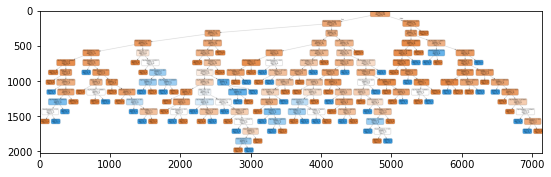

In [63]:
plt.imshow(img)

In [64]:
model.feature_importances_

array([0.5029864 , 0.36825327, 0.01914225, 0.01838681, 0.01716583,
       0.02149842, 0.01609356, 0.01700427, 0.0194692 ])

In [66]:
fi= pd.DataFrame({'feature': list(x_train.columns),
                 'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [67]:
fi

,feature,importance
0,City.Population,0.502986
1,Work.Experience,0.368253
5,Marital.Status_Married,0.021498
8,Urban_YES,0.019469
2,Undergrad_NO,0.019142
3,Undergrad_YES,0.018387
4,Marital.Status_Divorced,0.017166
7,Urban_NO,0.017004
6,Marital.Status_Single,0.016094


city population is most important feature